___

<a href='https://akademie.datamics.com/kursliste/'><img src='bg_datamics_top.png'/></a>
___
<center><em>© Datamics</em></center>
<center><em>Besuche uns für mehr Informationen auf <a href='https://akademie.datamics.com/kursliste/'>www.akademie.datamics.com</a></em></center>

# Klassifikation mit Keras TF 2.0 - Programmierprojekt

Lasst uns ein Klassifikationsproblem mit der Keras API für TF 2.0 bearbeiten!

## Der Datensatz

### Brustkrebs in Wisconsion (diagnostisch)
--------------------------------------------

**Datensatz Eigenschaften:**

    :Anzahl Einträge: 569

    :Anzahl Attribute: 30 numerische, prädiktive Attribute und die Klasse

    :Attributinformation:
        - Radius (Durchschnitt der Distanzen des Zentrums zum Perimeter)
        - Textur (Standardabweichung von Graustufen)
        - Perimeter
        - Fläche
        - Glattheit (lokale Variation der Radiuslänge)
        - Kompaktheit (Perimeter^2 / Fläche - 1.0)
        - Konkavität (Gewichtigkeit konkaver Anteile an der Kontur)
        - Konkave Punkte (Anzahl konkaver Punkte in der Kontur)
        - Symmetrie 
        - fraktale Dimension ("coastline approximation" - 1)

        Der Durchschnitt, die Standardabweichung und "schlimmster" oder 
        größte (Durchschnitt der drei größten Werte) dieser Features wurde 
        berechnet für jedes Bild, was 30 Features ergibt. Beispielsweise ist
        Feld 3 durchschnittlicher Radius, Feld 13 Radius SE, Feld 23 
        schlimmster Radius.

        - Klassen:
                - WDBC-Malignant
                - WDBC-Benign

    :Zusammengefasste Statistiken:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    Radius (Durchschnitt):                 6.981  28.11
    Textur (Durchschnitt):                 9.71   39.28
    Perimeter (Durchschnitt):              43.79  188.5
    Fläche (Durchschnitt):                 143.5  2501.0
    Glattheit (Durchschnitt):              0.053  0.163
    Kompaktheit (Durchschnitt):            0.019  0.345
    Konkavität (Durchschnitt):             0.0    0.427
    Konkave Punkte (Durchschnitt):         0.0    0.201
    Symmetrie (Durchschnitt):              0.106  0.304
    fraktale Dimension (Durchschnitt):     0.05   0.097
    Radius (Standardabw.):                 0.112  2.873
    Textur (Standardabw.):                 0.36   4.885
    Perimeter (Standardabw.):              0.757  21.98
    Fläche (Standardabw.):                 6.802  542.2
    Glattheit (Standardabw.):              0.002  0.031
    Kompaktheit (Standardabw.):            0.002  0.135
    Konkavität (Standardabw.):             0.0    0.396
    Konkave Punkte (Standardabw.):         0.0    0.053
    Symmetrie (Standardabw.):              0.008  0.079
    fraktale Dimension (Standardabw.):     0.001  0.03
    Radius (schlimmster):                  7.93   36.04
    Textur (schlimmster):                  12.02  49.54
    Perimeter (schlimmster):               50.41  251.2
    Fläche (schlimmster):                  185.2  4254.0
    Glattheit (schlimmster):               0.071  0.223
    Kompaktheit (schlimmster):             0.027  1.058
    Konkavität (schlimmster):              0.0    1.252
    Konkave Punkte (schlimmster):          0.0    0.291
    Symmetrie (schlimmster):               0.156  0.664
    fraktale Dimension (schlimmster):      0.055  0.208
    ===================================== ====== ======

    :Fehlende Attributwerte: None

    :Klassenverteilung: 212 - Malignant, 357 - Benign

    :Erstellt von:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Spender: Nick Street

    :Datum: November, 1995

Dies ist eine Kopie des UCI ML Breast Cancer Wisconsin (Diagnostic) Datensatzes.
https://goo.gl/U2Uwz2

Features wurden berechnet mittels digitalisierter Bilder von fine needle
aspirate (FNA)-Aufzeichnungen von Brüsten. Sie beschreiben Charakteristiken
der im Bild enthaltenen, zellulären  Nuklei.

Die obig beschriebene Trennebenewurde mit der Multisurface 
Method-Tree (MSM-T) ermittelt [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], einer auf linearer Programmierung basierenden
Klassifizierungsmethode zum Aufbau eines Entscheidungsbaums.
Relevante Features wurden mit einer erschöpfenden Suche über
1-4 Features und 1-3 Trennebenen errechnet.

Das zur Berechnung der Trennebenen im dreidimensionalen Raum
verwendete lineare Programm ist beschrieben in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

Diese Datenbank ist auch erhältlich auf dem UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. : Referenzen

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## EDA

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

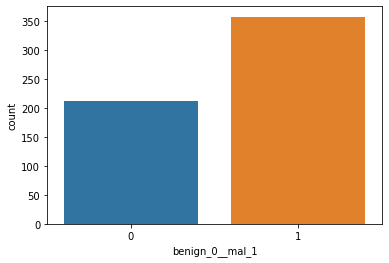

In [8]:
sns.countplot(x='benign_0__mal_1',data=df)

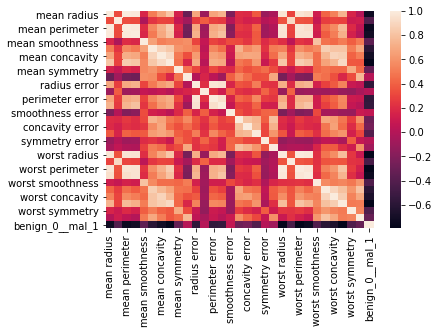

In [10]:
sns.heatmap(df.corr())

In [11]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

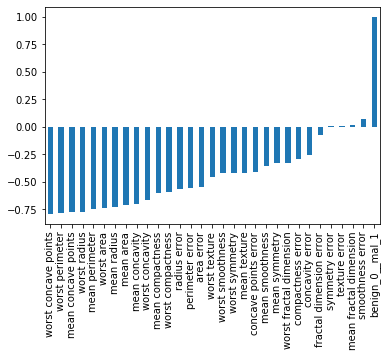

In [12]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

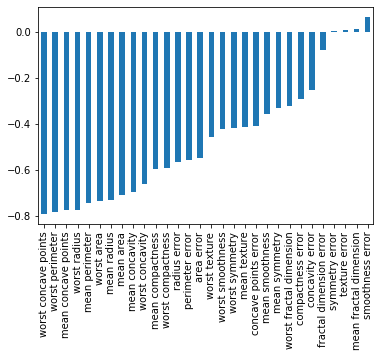

In [13]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

## Aufteilung Training-/Testdaten

In [14]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)


## Daten skalieren

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [20]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Modell erzeugen

    # Für das binäre Klassifikationsproblem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  
    

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [22]:
X_train.shape

(426, 30)

In [23]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

## Modell trainieren

### Beispiel Eins: Zuviele Epochen wählen und Overfitting (Überanpassung)!

In [24]:
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 4s 10ms/sample - loss: 0.7076 - val_loss: 0.6765
Epoch 2/600
426/426 [==============================] - 0s 365us/sample - loss: 0.6626 - val_loss: 0.6449
Epoch 3/600
426/426 [==============================] - 0s 164us/sample - loss: 0.6284 - val_loss: 0.6088
Epoch 4/600
426/426 [==============================] - 0s 174us/sample - loss: 0.5891 - val_loss: 0.5695
Epoch 5/600
426/426 [==============================] - 0s 163us/sample - loss: 0.5490 - val_loss: 0.5279
Epoch 6/600
426/426 [==============================] - 0s 172us/sample - loss: 0.5085 - val_loss: 0.4848
Epoch 7/600
426/426 [==============================] - 0s 195us/sample - loss: 0.4656 - val_loss: 0.4378
Epoch 8/600
426/426 [==============================] - 0s 162us/sample - loss: 0.4180 - val_loss: 0.3882
Epoch 9/600
426/426 [==============================] - 0s 183us/sample - loss: 0.3667 - val_loss: 0.3353
Epoch 10/6

Epoch 78/600
426/426 [==============================] - 0s 159us/sample - loss: 0.0513 - val_loss: 0.0955
Epoch 79/600
426/426 [==============================] - 0s 168us/sample - loss: 0.0576 - val_loss: 0.0949
Epoch 80/600
426/426 [==============================] - 0s 172us/sample - loss: 0.0505 - val_loss: 0.0927
Epoch 81/600
426/426 [==============================] - 0s 157us/sample - loss: 0.0511 - val_loss: 0.1024
Epoch 82/600
426/426 [==============================] - 0s 175us/sample - loss: 0.0494 - val_loss: 0.0914
Epoch 83/600
426/426 [==============================] - 0s 163us/sample - loss: 0.0558 - val_loss: 0.1033
Epoch 84/600
426/426 [==============================] - 0s 154us/sample - loss: 0.0515 - val_loss: 0.0935
Epoch 85/600
426/426 [==============================] - 0s 152us/sample - loss: 0.0504 - val_loss: 0.0966
Epoch 86/600
426/426 [==============================] - 0s 177us/sample - loss: 0.0507 - val_loss: 0.0914
Epoch 87/600
426/426 [========================

Epoch 155/600
426/426 [==============================] - 0s 151us/sample - loss: 0.0369 - val_loss: 0.1002
Epoch 156/600
426/426 [==============================] - 0s 191us/sample - loss: 0.0361 - val_loss: 0.1072
Epoch 157/600
426/426 [==============================] - 0s 161us/sample - loss: 0.0437 - val_loss: 0.1007
Epoch 158/600
426/426 [==============================] - 0s 158us/sample - loss: 0.0391 - val_loss: 0.1024
Epoch 159/600
426/426 [==============================] - 0s 169us/sample - loss: 0.0365 - val_loss: 0.1074
Epoch 160/600
426/426 [==============================] - 0s 161us/sample - loss: 0.0348 - val_loss: 0.1037
Epoch 161/600
426/426 [==============================] - 0s 150us/sample - loss: 0.0407 - val_loss: 0.1054
Epoch 162/600
426/426 [==============================] - 0s 166us/sample - loss: 0.0427 - val_loss: 0.1011
Epoch 163/600
426/426 [==============================] - 0s 165us/sample - loss: 0.0376 - val_loss: 0.1031
Epoch 164/600
426/426 [==============

426/426 [==============================] - 0s 164us/sample - loss: 0.0183 - val_loss: 0.1265
Epoch 308/600
426/426 [==============================] - 0s 146us/sample - loss: 0.0175 - val_loss: 0.1446
Epoch 309/600
426/426 [==============================] - 0s 168us/sample - loss: 0.0162 - val_loss: 0.1294
Epoch 310/600
426/426 [==============================] - 0s 164us/sample - loss: 0.0202 - val_loss: 0.1578
Epoch 311/600
426/426 [==============================] - 0s 160us/sample - loss: 0.0167 - val_loss: 0.1417
Epoch 312/600
426/426 [==============================] - 0s 163us/sample - loss: 0.0156 - val_loss: 0.1343
Epoch 313/600
426/426 [==============================] - 0s 158us/sample - loss: 0.0165 - val_loss: 0.1619
Epoch 314/600
426/426 [==============================] - 0s 157us/sample - loss: 0.0206 - val_loss: 0.1307
Epoch 315/600
426/426 [==============================] - 0s 172us/sample - loss: 0.0153 - val_loss: 0.1539
Epoch 316/600
426/426 [============================

426/426 [==============================] - 0s 153us/sample - loss: 0.0066 - val_loss: 0.2328
Epoch 460/600
426/426 [==============================] - 0s 171us/sample - loss: 0.0060 - val_loss: 0.2077
Epoch 461/600
426/426 [==============================] - 0s 159us/sample - loss: 0.0056 - val_loss: 0.2121
Epoch 462/600
426/426 [==============================] - 0s 152us/sample - loss: 0.0062 - val_loss: 0.2067
Epoch 463/600
426/426 [==============================] - 0s 150us/sample - loss: 0.0056 - val_loss: 0.2139
Epoch 464/600
426/426 [==============================] - 0s 163us/sample - loss: 0.0057 - val_loss: 0.2091
Epoch 465/600
426/426 [==============================] - 0s 147us/sample - loss: 0.0053 - val_loss: 0.2209
Epoch 466/600
426/426 [==============================] - 0s 150us/sample - loss: 0.0059 - val_loss: 0.2220
Epoch 467/600
426/426 [==============================] - 0s 155us/sample - loss: 0.0057 - val_loss: 0.2130
Epoch 468/600
426/426 [============================

In [25]:
# model.history.history

In [26]:
model_loss = pd.DataFrame(model.history.history)

In [27]:
# model_loss

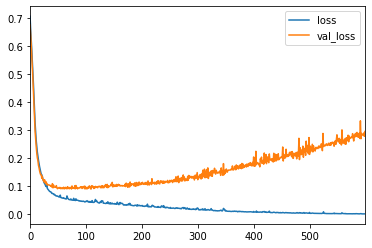

In [28]:
model_loss.plot()

## Beispiel Zwei: Früher Abbruch

Wir haben offensichtlich zuviel trainiert! Lasst uns früh abbrechen, um val_loss zu beobachten und das Training zu stoppen, wenn val_loss zu stark ansteigt!

In [29]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

Beende das Training, wenn eine überwachte Größe aufhört, sich zu verbessern.

    Argumente:
        monitor: Zu überwachende Größe.
        min_delta: Minimale Änderung der überwachten Größe, 
                   die als Verbesserung betrachtet wird;
                   eine Änderung kleiner min_delta wird als
                   keine Verbesserung gewertet.
        patience: Anzahl der Epochen ohne Verbesserung, 
                  nachder das Training gestoppt wird.
        verbose: detaillierte Ausgabe.
        mode: Mögliche Werte `{"auto", "min", "max"}`. 
              `min` stoppt, wenn die überwachte Größe
              aufhört, zu schrumpfen; `max` stoppt,
              wenn die überwachte Größe aufhört, zu
              wachsen; `auto`leitet das entsprechende
              Verhalten vom Namen der überwachten 
              Größe ab.

In [31]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [32]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.7049 - val_loss: 0.6709
Epoch 2/600
426/426 [==============================] - 0s 186us/sample - loss: 0.6634 - val_loss: 0.6386
Epoch 3/600
426/426 [==============================] - 0s 187us/sample - loss: 0.6333 - val_loss: 0.6111
Epoch 4/600
426/426 [==============================] - 0s 177us/sample - loss: 0.6051 - val_loss: 0.5824
Epoch 5/600
426/426 [==============================] - 0s 190us/sample - loss: 0.5765 - val_loss: 0.5495
Epoch 6/600
426/426 [==============================] - 0s 174us/sample - loss: 0.5412 - val_loss: 0.5081
Epoch 7/600
426/426 [==============================] - 0s 170us/sample - loss: 0.5006 - val_loss: 0.4666
Epoch 8/600
426/426 [==============================] - 0s 181us/sample - loss: 0.4553 - val_loss: 0.4097
Epoch 9/600
426/426 [==============================] - 0s 152us/sample - loss: 0.3947 - val_loss: 0.3461
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 157us/sample - loss: 0.0555 - val_loss: 0.1141
Epoch 79/600
426/426 [==============================] - 0s 153us/sample - loss: 0.0547 - val_loss: 0.1140
Epoch 80/600
426/426 [==============================] - 0s 145us/sample - loss: 0.0563 - val_loss: 0.1168
Epoch 81/600
426/426 [==============================] - 0s 166us/sample - loss: 0.0541 - val_loss: 0.1157
Epoch 82/600
426/426 [==============================] - 0s 154us/sample - loss: 0.0542 - val_loss: 0.1173
Epoch 83/600
426/426 [==============================] - 0s 158us/sample - loss: 0.0568 - val_loss: 0.1122
Epoch 84/600
426/426 [==============================] - 0s 156us/sample - loss: 0.0611 - val_loss: 0.1145
Epoch 85/600
426/426 [==============================] - 0s 173us/sample - loss: 0.0553 - val_loss: 0.1158
Epoch 86/600
426/426 [==============================] - 0s 152us/sample - loss: 0.0539 - val_loss: 0.1142
Epoch 87/600
426/426 [========================

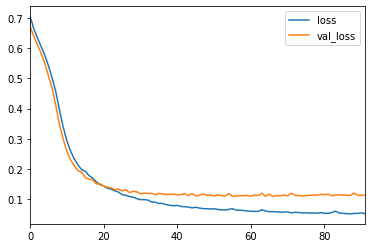

In [33]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Beispiel Drei: DropOut Layer hinzufügen

In [34]:
from tensorflow.keras.layers import Dropout

In [35]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [36]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.7220 - val_loss: 0.6850
Epoch 2/600
426/426 [==============================] - 0s 209us/sample - loss: 0.6956 - val_loss: 0.6656
Epoch 3/600
426/426 [==============================] - 0s 172us/sample - loss: 0.6725 - val_loss: 0.6465
Epoch 4/600
426/426 [==============================] - 0s 184us/sample - loss: 0.6470 - val_loss: 0.6255
Epoch 5/600
426/426 [==============================] - 0s 187us/sample - loss: 0.6391 - val_loss: 0.6038
Epoch 6/600
426/426 [==============================] - 0s 177us/sample - loss: 0.6244 - val_loss: 0.5808
Epoch 7/600
426/426 [==============================] - 0s 223us/sample - loss: 0.6033 - val_loss: 0.5520
Epoch 8/600
426/426 [==============================] - 0s 242us/sample - loss: 0.5704 - val_loss: 0.5226
Epoch 9/600
426/426 [==============================] - 0s 200us/sample - loss: 0.5535 - val_loss: 0.4961
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 192us/sample - loss: 0.1302 - val_loss: 0.0835
Epoch 79/600
426/426 [==============================] - 0s 192us/sample - loss: 0.1473 - val_loss: 0.0896
Epoch 80/600
426/426 [==============================] - 0s 166us/sample - loss: 0.1183 - val_loss: 0.0837
Epoch 81/600
426/426 [==============================] - 0s 206us/sample - loss: 0.1225 - val_loss: 0.0879
Epoch 82/600
426/426 [==============================] - 0s 197us/sample - loss: 0.1124 - val_loss: 0.0907
Epoch 83/600
426/426 [==============================] - 0s 198us/sample - loss: 0.1191 - val_loss: 0.0823
Epoch 84/600
426/426 [==============================] - 0s 196us/sample - loss: 0.1045 - val_loss: 0.0813
Epoch 85/600
426/426 [==============================] - 0s 167us/sample - loss: 0.1216 - val_loss: 0.1053
Epoch 86/600
426/426 [==============================] - 0s 163us/sample - loss: 0.1241 - val_loss: 0.0817
Epoch 87/600
426/426 [========================

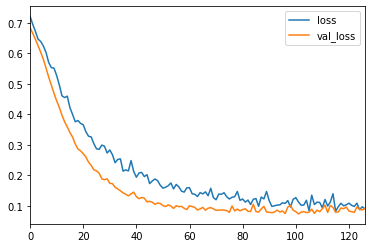

In [37]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Modellevaluation

In [38]:
predictions = model.predict_classes(X_test)

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.99      0.95      0.97        88

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



In [41]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 4 84]]


# Gut gemacht!